In [ ]:
#I have implemented Dynamic Model of the Vehicle and tested it with Longitidunal parameters

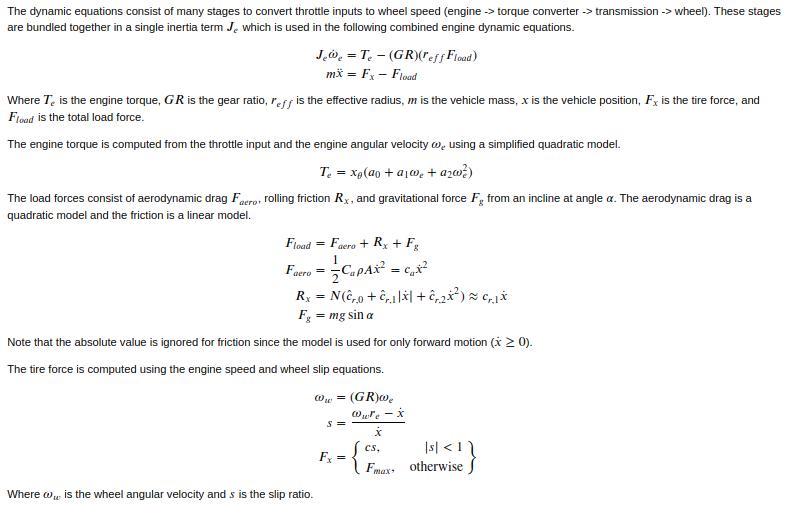

In [ ]:
#Lets import the libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Lets create the Vehicle class and define its attributes and methods

In [3]:
class Vehicle():
    def __init__(self):
 
        # ==================================
        #  Parameters
        # ==================================
    
        #Throttle to engine torque
        self.a_0 = 400
        self.a_1 = 0.1
        self.a_2 = -0.0002
        
        # Gear ratio, effective radius, mass + inertia
        self.GR = 0.35
        self.r_e = 0.3
        self.J_e = 10
        self.m = 2000
        self.g = 9.81
        
        # Aerodynamic and friction coefficients
        self.c_a = 1.36
        self.c_r1 = 0.01
        
        # Tire force 
        self.c = 10000
        self.F_max = 10000
        
        # State variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0
        
        self.sample_time = 0.01
        
    def reset(self):
        # reset state variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0

In [4]:
#Lets create the step method and apply longitidunal dynamic formulas to move the car.

In [5]:
class Vehicle(Vehicle):
    def step(self, throttle, alpha):
        Te = throttle *(self.a_0 + self.a_1*self.w_e + self.a_2*self.w_e**2)
        F_aero = self.c_a*self.v**2
        Rx = self.c_r1*self.v
        Fg = self.m*self.g*np.sin(alpha)
        F_load = F_aero + Rx + Fg
        
        self.w_e_dot = (Te - (self.GR)*(self.r_e*F_load))/self.J_e
        
        ww = (self.GR)*self.w_e
        s = (ww*self.r_e - self.v) / self.v
        
        if abs(s) < 1:
            Fx = self.c * s
        else:
            Fx = self.F_max
        
        self.a = (Fx - F_load) / self.m
        self.v = self.v + self.a*self.sample_time
        self.x = self.x + self.v*self.sample_time - (0.5*self.a*self.sample_time**2)
        self.w_e = self.w_e + self.w_e_dot*self.sample_time
        pass

In [6]:
#Type One: Move the car with constant throttle, without using alpha value

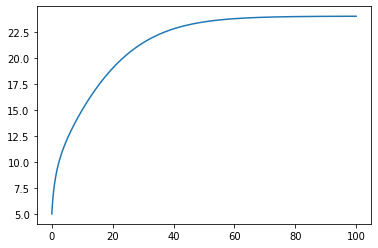

In [7]:
sample_time = 0.01
time_end = 100
model = Vehicle()

t_data = np.arange(0,time_end,sample_time)
v_data = np.zeros_like(t_data)

# throttle percentage between 0 and 1
throttle = 0.2

# incline angle (in radians)
alpha = 0

for i in range(len(t_data)):
    v_data[i] = model.v
    model.step(throttle, alpha)
    
plt.plot(t_data, v_data)
plt.show()

In [ ]:
#Type 2: Move the car with alpha value, decrease or increase throttle according to alpha, on this path

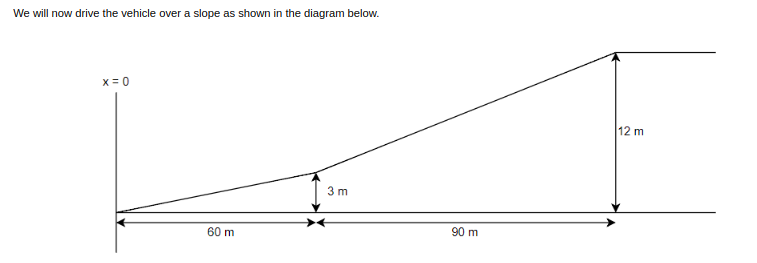

In [8]:
time_end = 20
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
alpha = np.zeros_like(t_data)
throttle = np.zeros_like(t_data)
a_data = np.zeros_like(t_data)
# reset the states
model.reset()

def alphaa(i,alpha,x):
    if x < 60:
        alpha[i] = np.arctan(3/60)
    elif x < 150:
        alpha[i] = np.arctan(9/90)
    else:
        alpha[i] = 0
        

for i in range(len(t_data)):
    if t_data[i] < 5 :
        throttle[i] = 0.2 + ((0.5-0.2)/5)*t_data[i]
        alphaa(i,alpha,model.x)
    elif t_data[i] < 15:
        throttle[i] = 0.5
        alphaa(i,alpha,model.x)
    else:
        throttle[i] = ((0 - 0.5)/(20 - 15))*(t_data[i] - 20)
        alphaa(i,alpha,model.x)

    model.step(throttle[i],alpha[i])
    x_data[i] = model.x
    a_data[i] = model.a

In [ ]:
#Lets see the results: 1. graph = path , 2. graph = throttle output , 3. graph = acceleration output

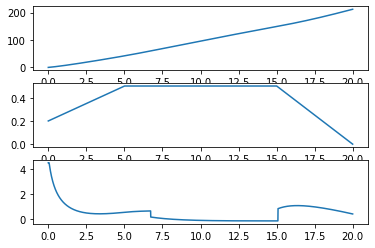

In [9]:
plt.figure(1)
plt.subplot(311)
plt.plot(t_data, x_data)
plt.subplot(312)
plt.plot(t_data, throttle)
plt.subplot(313)
plt.plot(t_data, a_data)